## Math 360 Group Assignment 2 - Stochastic Models
Autum Cheung, Merlin Reinders, Liyuan Ding, Éabha Farrell

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
from scipy.stats import norm
import scipy.stats as stats
import pandas as pd
%matplotlib inline

print("packages imported")

packages imported


#### Problem Statement
How does the weather affect the income of Loafe Café, UBC? 

#### Variables and parameters:

| Description | Symbol | Dimensions |Type|
| :---: | :---: | :---: | :---: |
| Total no. of daily customers | $C$ | 1 |dependent variable|
| Average daily temperature | $T$ | K |random variable (type tbd) (independent)|
| Total daily precipitation | $P$ | L |random variable (type tbd) (independent)|
| Average daily humidity | $H$ | 1 |random variable (type tbd) (independent)|
| Reference no. of customers | $C_0$ | 1 |parameter|
| Reference temperature | $T_0$| K |parameter|
| Reference humidity | $H_0$ | 1 |parameter|
| Rate of change of customers w.r.t. square of temperature | $a$ | tbd |parameter|
| Rate of change of customers w.r.t. precipitation | $b$ | tbd |parameter|
| Rate of change of customers w.r.t. square of humidity | $c$ | tbd |parameter|
| Average amount spent per customer | $S$ | 1 |parameter|

## Things to think about 
- just as they occur to me as I type this lol
- do we want the avg amount spent per customer to vary with weather?
- what should the dimension for something with the unit $ be? just 1?
- do we want to include uncertainty in the parameters?

#### Assumptions and constraints:
- The variables $T$, $P$, and $H$ are random and distributed according to (whatever distributions we find them to be)
- The café doesn't run out of food / drinks
- Café is open every day (except for university closures)
- Weather and number of customers is consistent with the prompt 

#### Build solutions

In [6]:
df_weather = pd.read_csv('weatherstats_vancouver_daily_2025.csv')
df_customers = pd.read_csv('customer_data_2025.csv')

print(type(df_weather))
print(type(df_customers))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           10227 non-null  int64  
 1   Month          10227 non-null  int64  
 2   Day            10227 non-null  int64  
 3   temperature    10227 non-null  float64
 4   humidity       10227 non-null  float64
 5   precipitation  10227 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 479.5 KB


In [9]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Hour                                       12 non-null     int64
 1   January_Frequency_Customers_Alumni_Centre  12 non-null     int64
 2   January_Frequency_Customers_Sauder         12 non-null     int64
 3   July_Frequency_Customers_Alumni_Centre     12 non-null     int64
 4   July_Frequency_Customers_Sauder            12 non-null     int64
dtypes: int64(5)
memory usage: 612.0 bytes


In [11]:
df_weather.head()

,Year,Month,Day,temperature,humidity,precipitation
0,2024,12,31,4.95,91.0,1.4
1,2024,12,30,4.25,99.0,10.7
2,2024,12,29,5.09,96.5,8.1
3,2024,12,28,8.55,87.5,7.1
4,2024,12,27,6.75,90.5,5.0


In [12]:
df_customers.head()

,Hour,January_Frequency_Customers_Alumni_Centre,January_Frequency_Customers_Sauder,July_Frequency_Customers_Alumni_Centre,July_Frequency_Customers_Sauder
0,7,87,68,87,0
1,8,235,187,137,111
2,9,372,305,203,186
3,10,410,301,222,187
4,11,533,414,265,245


In [13]:
df_customers.tail()

,Hour,January_Frequency_Customers_Alumni_Centre,January_Frequency_Customers_Sauder,July_Frequency_Customers_Alumni_Centre,July_Frequency_Customers_Sauder
7,14,815,662,478,378
8,15,737,607,397,312
9,16,704,524,375,0
10,17,624,512,312,0
11,18,107,0,54,0


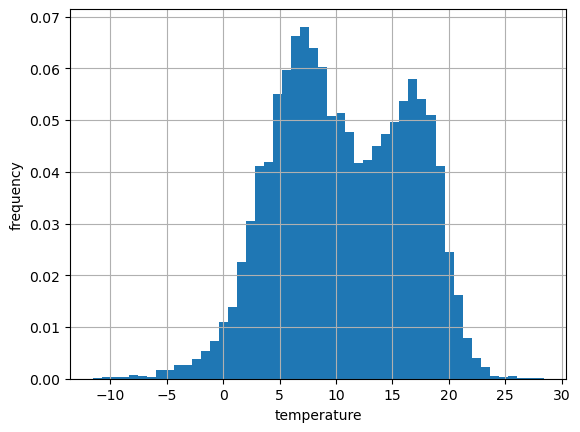

In [15]:
df_weather['temperature'].hist(bins=50, density=True)
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.show()

# two peaks presumably jan mean & july mean - maybe two separate histograms & kdes?

January and July appear to each be normally distributed, with different means

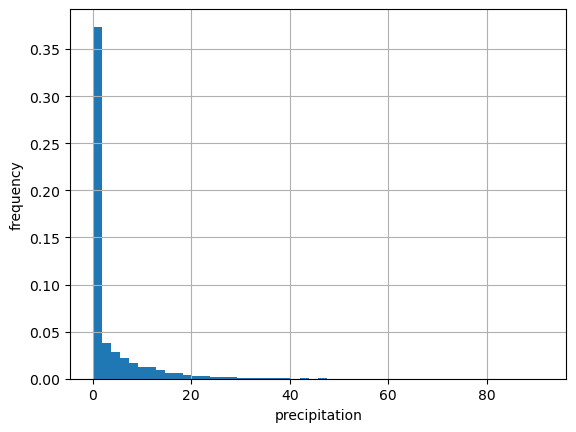

In [16]:
df_weather['precipitation'].hist(bins=50, density=True)
plt.xlabel('precipitation')
plt.ylabel('frequency')
plt.show()

# two peaks presumably jan mean & july mean - maybe two separate histograms & kdes? 

This would prob be best modelled as an exponential distribution

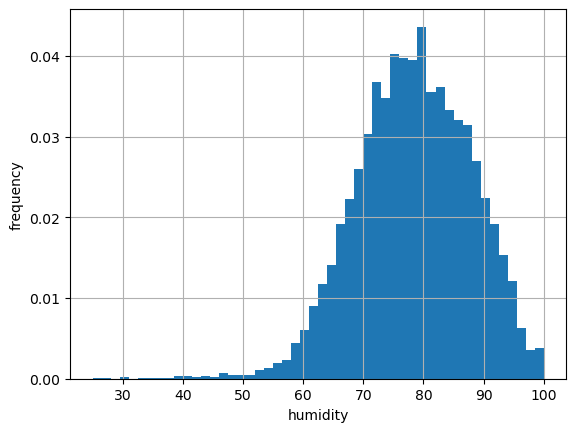

In [17]:
df_weather['humidity'].hist(bins=50, density=True)
plt.xlabel('humidity')
plt.ylabel('frequency')
plt.show()

# two peaks presumably jan mean & july mean - maybe two separate histograms & kdes? 

Appears to be normal here, except of course with a cutoff at 100% since humidity can't be higher than that 